# HOW TO USE THIS TEMPLATE

1. Copy this template notebook and rename to reflect the scenario results described within.
2. Within the scenario results notebook, content _outside_ of brackets "<", ">" should remain exactly as-is in the scenario result notebook--this includes the code used to generate displayed results. Text _within_ these brackets must be replaced with the scenario-specific information noted.
3. **Delete this Markdown block** in the scenario results notebook before delivering the report!

# Summary

The **Network Failures - Oracle** scenario group investigates the impact of different impediments preventing a price oracle from faithfully transmitting pricing information to the ecosystem. The price oracle may be impeded in several different ways: it may be interrupted for a given period of time (providing no pricing information), it may be delayed (providing lagged information), or it may be distorted (it may become biased or contain extraneous volatility). For each of these impediments, the scenarios assess the impact on servicer and gateway profitability, as well on POKT supply, net inflation of POKT and POKT holdings of the DAO.

Because an exhaustive 'sweep' of every possible combination of relevant protocol parameters is computationally infeasible, this study has instead performed an **adaptive search**, whereby a coarse initial grid of parameters is successively refined by applying the success criteria to generated KPIs, and inferring a new 'direction' of search for a succeeding grid. Convergence is achieved when all success criteria are met across the performed simulations. Although it is always possible that multiple "equilibria" exist, such that success criteria are met by parameter combinations that are not found from adaptive search, the initial grid is informed by existing parameter values from the Pocket network and hence benefit from the expert knowledge used to define those initial values. 

Future work can perform a more thorough search of the underlying parameter space, in addition to performing more demand scenarios and realizations from the exogenous distributions that represent external factors.

# Contents

**Experimental Setup**: This covers the objective of the study and its methodology, describes the KPIs and success indicators (threshold inequalities), the protocol and environmental sweep parameters and their initial ranges, and finally summarizes the computational complexity of the simulations themselves.

**Adaptive Grid Results**: The evolution of the parameter selection process is presented as a visualization, showing the convergence of the protocol parameter ranges as different success criteria are achieved.

**Protocol Parameter Recommendations**: Based upon the adaptive grid results, the recommended parameter ranges are presented.

**Decision Tree and Parameter Importance**: Using the adaptive grid results, a machine-learning process is applied to infer the importance of different parameters on the associated KPI-based threshold inequalities. This provides a method of assessing whether one or more parameters are 'crucial' to success, in the sense that they have an outsized impact on the success criteria. This approach leverages decision trees that are fit to the results of the entire adaptive grid process.

**Parameter Impact on KPIs**: A density approach (histogram) can be used to assess the impact of protocol parameters on the KPIs of the scenario. The KPI densities are shown for each protocol parameter sweep value, providing a visual indication of the impact of the parameter on the density shape and location.

**Conclusion**: An overall assessment of the scenario results is provided, highlighting any problems, caveats, implications and possibilities for future/extended work.


# Experimental Setup

## Objective and Methodology

THe objective of the network failures - oracle scenario group is to understand the impact of an impedence (deliberate or accidental) of the oracle price signal of USD/POKT on reward incentives and ecosystem performance.

- **System Goals Targeted**:
  - Economic Viability
  - Long-Term Value Generation
- **Design**: allow a 'true' oracle price signal to be impeded without the knowledge of network participants (so that no expectations formation is performed)
- **Testing mechanism**:
  - Environmental:
      - Introduce different interruption durations of the true oracle price, ranging across a number of days (including a permanent interruption). Halfway through the simulation the oracle price is interrupted, either temporarily for a fixed number of periods (a delay) or permanently (an interruption).
      - Introduce different trend and volatility biases to the true oracle price, as proxies for accidental or deliberate oracle manipulation. Halfway through the simulaton the bias is introduced, and remains until the end of the simulation. 
  - Protocol:
     - Assess the impact of different `RelaysToTokensMultiplier` (RTTM) values. The RTTM is the conversion rate between the relays that a servicer services and the tokens rewarded (referred to in the [V1 utility specification](https://github.com/pokt-network/pocket-network-protocol/tree/325d7adb691e7e6b1d448eab4455b292c115459c/utility#325-salary-eligibility--distribution) as "salary"). Low RTTM values reflect small rewards for servicing relays, impacting servicer revenue expectations and profitability.
     - Assess the impact of different `GatewayFeePerRelay` (GFPR) values. This is a direct cost assessed to gateways from having their relays served.
     - Assess the impact of different `ApplicationFeePerRelay` (AFPR) values. This is a direct cost assessed to applications from having their relays served.
     - Assess the impact of different `GatewayMinimumStake` (GMS) values. This is a running cost that must be fulfilled in order to participate as a gateway, and has an associated opportunity cost (value of using staked funds for an alternative use, proxied here by its investment in a risk-free instrument paying a 5% annual rate of return).
     - Assess the impact of different `ApplicationMinimumStake` (AMS) values. To prevent barriers to entry it is generally accepted that AMS < GMS, as applications are expected to operate on a smaller scale. But AMS values impact gateway profitability as well.
     - Assess the impact of different `DAOAllocation` (DAL) values. The DAO receives a fraction of the block reward, impacting servicer profitability.
     - Assess the impact of different `ValidatorFeePercentage` (VFP) values. The validator and DAO split transactions fees, which impacts the revenue of the DAO.

## KPIs

- Servicer NPV (KPI-1): This measures whether or not servicers are profitable.
- Gateway NPV (KPI-3): This measures whether or not gateways are profitable.
- POKT Circulating Supply (KPI-4): This is the total amount of POKT that is not staked by participants.
- POKT Available Supply (KPI-5): This the sum of circulating POKT (KPI-4) and POKT staked by participants.
- Net Inflation (KPI-D): This the the difference between the amount of new POKT created from block rewards and POKT burnt from slashing penalties, QoS adjustment etc. 
- DAO Value Capture (KPI-10): This is the ratio between the amount of POKT held in the DAO's Treasury and the total amount of POKT available supply (KPI-5).
- Servicer Capital Costs per Unit of Reward (KPI-14): This measures the trade-off that exists between the opportunity cost of being a servicer and the expected reward. Intuitively, the ecosystem should not 1) make it more attractive for servicers to exit the ecosystem (even if profitable), or 2) reduce security by rewarding participation to the extent that the stake does not become a deterrent to undesirable behavior.

## Threshold Inequalities

1. (**Servicer NPV**) The fraction of the Monte Carlo simulations for which Servicer NPV is greater than $750$ POKT must be at least $90$%. This inequality restriction is referenced in the code as `servicer_npv_success`.
2. (**Gateway NPV**) The fraction of the Monte Carlo simulations for which Gateway NPV is greater than $7500$ POKT must be at least $90$%. This inequality is referenced in the code as `gateway_npv_success`.
3. (**Circulating Supply**, **Available Supply**) The average fraction of circulating supply to available supply should not be less than $30$%. This inequality is referenced in the code as `circulating_supply_available_supply_ratio_success`.
4. (**Net Inflation**) The average net inflation rate of POKT should fall between $-10$% and $5$%. This inequality is referenced in the code as `net_inflation_success`.
5. (**DAO Value Capture**) The fraction of the Monte Carlo simulations for which DAO value capture lies between $2$% and $10$% must be at least $90$%. This inequality is referenced in the code as `dao_value_capture_success`.

## Sweep Parameters

### Swept Protocol Parameters

1. `RelaysToTokensMultiplier` (`RTTM`)
2. `GatewayFeePerRelay` (`GFPR`)
3. `ApplicationFeePerRelay` (`AFPR`)
4. `GatewayMinimumStake` (`GMS`)
5. `ApplicationMinimumStake` (`AMS`)
6. `DAOAllocation` (`DAL`)
7. `ValidatorFeePercentage` (`VFP`) 

### Swept Environmental Parameters

1. The mean time that the oracle is distorted or delayed, `oracle_treatment_time_mean`. This is the average number of days (the minimum fidelity of the simulation) that a price oracle experiences a distortion or a delay. After this time interval has passed, the price returns to its 'true' oracle value.
2. The type of price oracle impediment, in an `event` variable. Sweeping this represents different types of impediments to the 'true' oracle price, ranging from oracle shutdown, to the delay of an oracle for a mean time given by `oracle_treatment_time_mean`, to different mixtures of trend bias and volatility (positive bias and low volatility, postive bias and high volatility, negative bias and low volatility, negative bias and high volatility, unbiased and low volatility and unbiased and high volatility).

## Initial Parameter Sweep Ranges

Protocol and Environmental parameters were initialized for the first adaptive grid search according to:
1. Values found in the specifications provided to BlockScience ([V1 Mechanism spreadsheet](https://docs.google.com/spreadsheets/d/1Gpnw3ZXNh9lWFgmrbrg8wTqVKPD2M8QqJdAiAALru38/edit?usp=sharing), [V1 Minting spreadsheet](https://docs.google.com/spreadsheets/d/1QYe6NzuiyimsXs5cT1BSM-UT1DtX_K38cOZsEFJOtdA/edit?usp=sharing)),
2. Discussions with the Pocket team, and
3. BlockScience best practice. 

### Environmental Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| Average delay/distortion time | `oracle_treatment_time_mean` | (1, 10, 100) | Days |
| Type of impedence event | `event` | ('shutdown', 'delay',<br> 'low bias / low vol', 'low bias / high vol',<br> 'high bias / low vol', 'high bias / high vol',<br> 'no bias / low vol', 'no bias / high vol') | String |

### Protocol Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| `RelaysToTokensMultiplier` | `RTTM` | (100, 200) | uPOKT/relay |
| `GatewayFeePerRelay` | `GFPR` | (10, 100) | uPOKT/relay |
| `ApplicationFeePerRelay` |`AFPR` | (10, 100) | uPOKT/relay |
| `GatewayMinimumStake` | `GMS`  | (1e5,2e5) | POKT |
| `ApplicationMinimumStake` | `AMS`  | (1e4, 2e4)  | POKT |
| `DAOAllocation` | `DAL`  | (0.05, 0.15) | %/100 |
| `ValidatorFeePercentage` | `VFP`  | (0.01, 0.10) | %/100 |

## Computational Complexity

**Total number of parameter constellations**: 3,072

**Total number of Monte Carlo runs per constellation**: 5

**Total number of experiments per adaptive grid**: 15,360

**Number of adaptive grid searches**: 6

**Total number of parameter constellations evaluated**: 92,160

# Adaptive Grid Results

In [1]:
import os
os.chdir("..")
from psuu import load_all_kpi_comparison_data, load_scenario_kpi_comparison_data, threshold_comparison_plot, decision_tree_feature_importance_plot, load_sweep

KPIs are referenced as:
servicer_npv_success: 1
gateway_npv_success: 2
circulating_supply_available_supply_ratio_success: 3
net_inflation_success: 4
dao_value_capture_success: 5


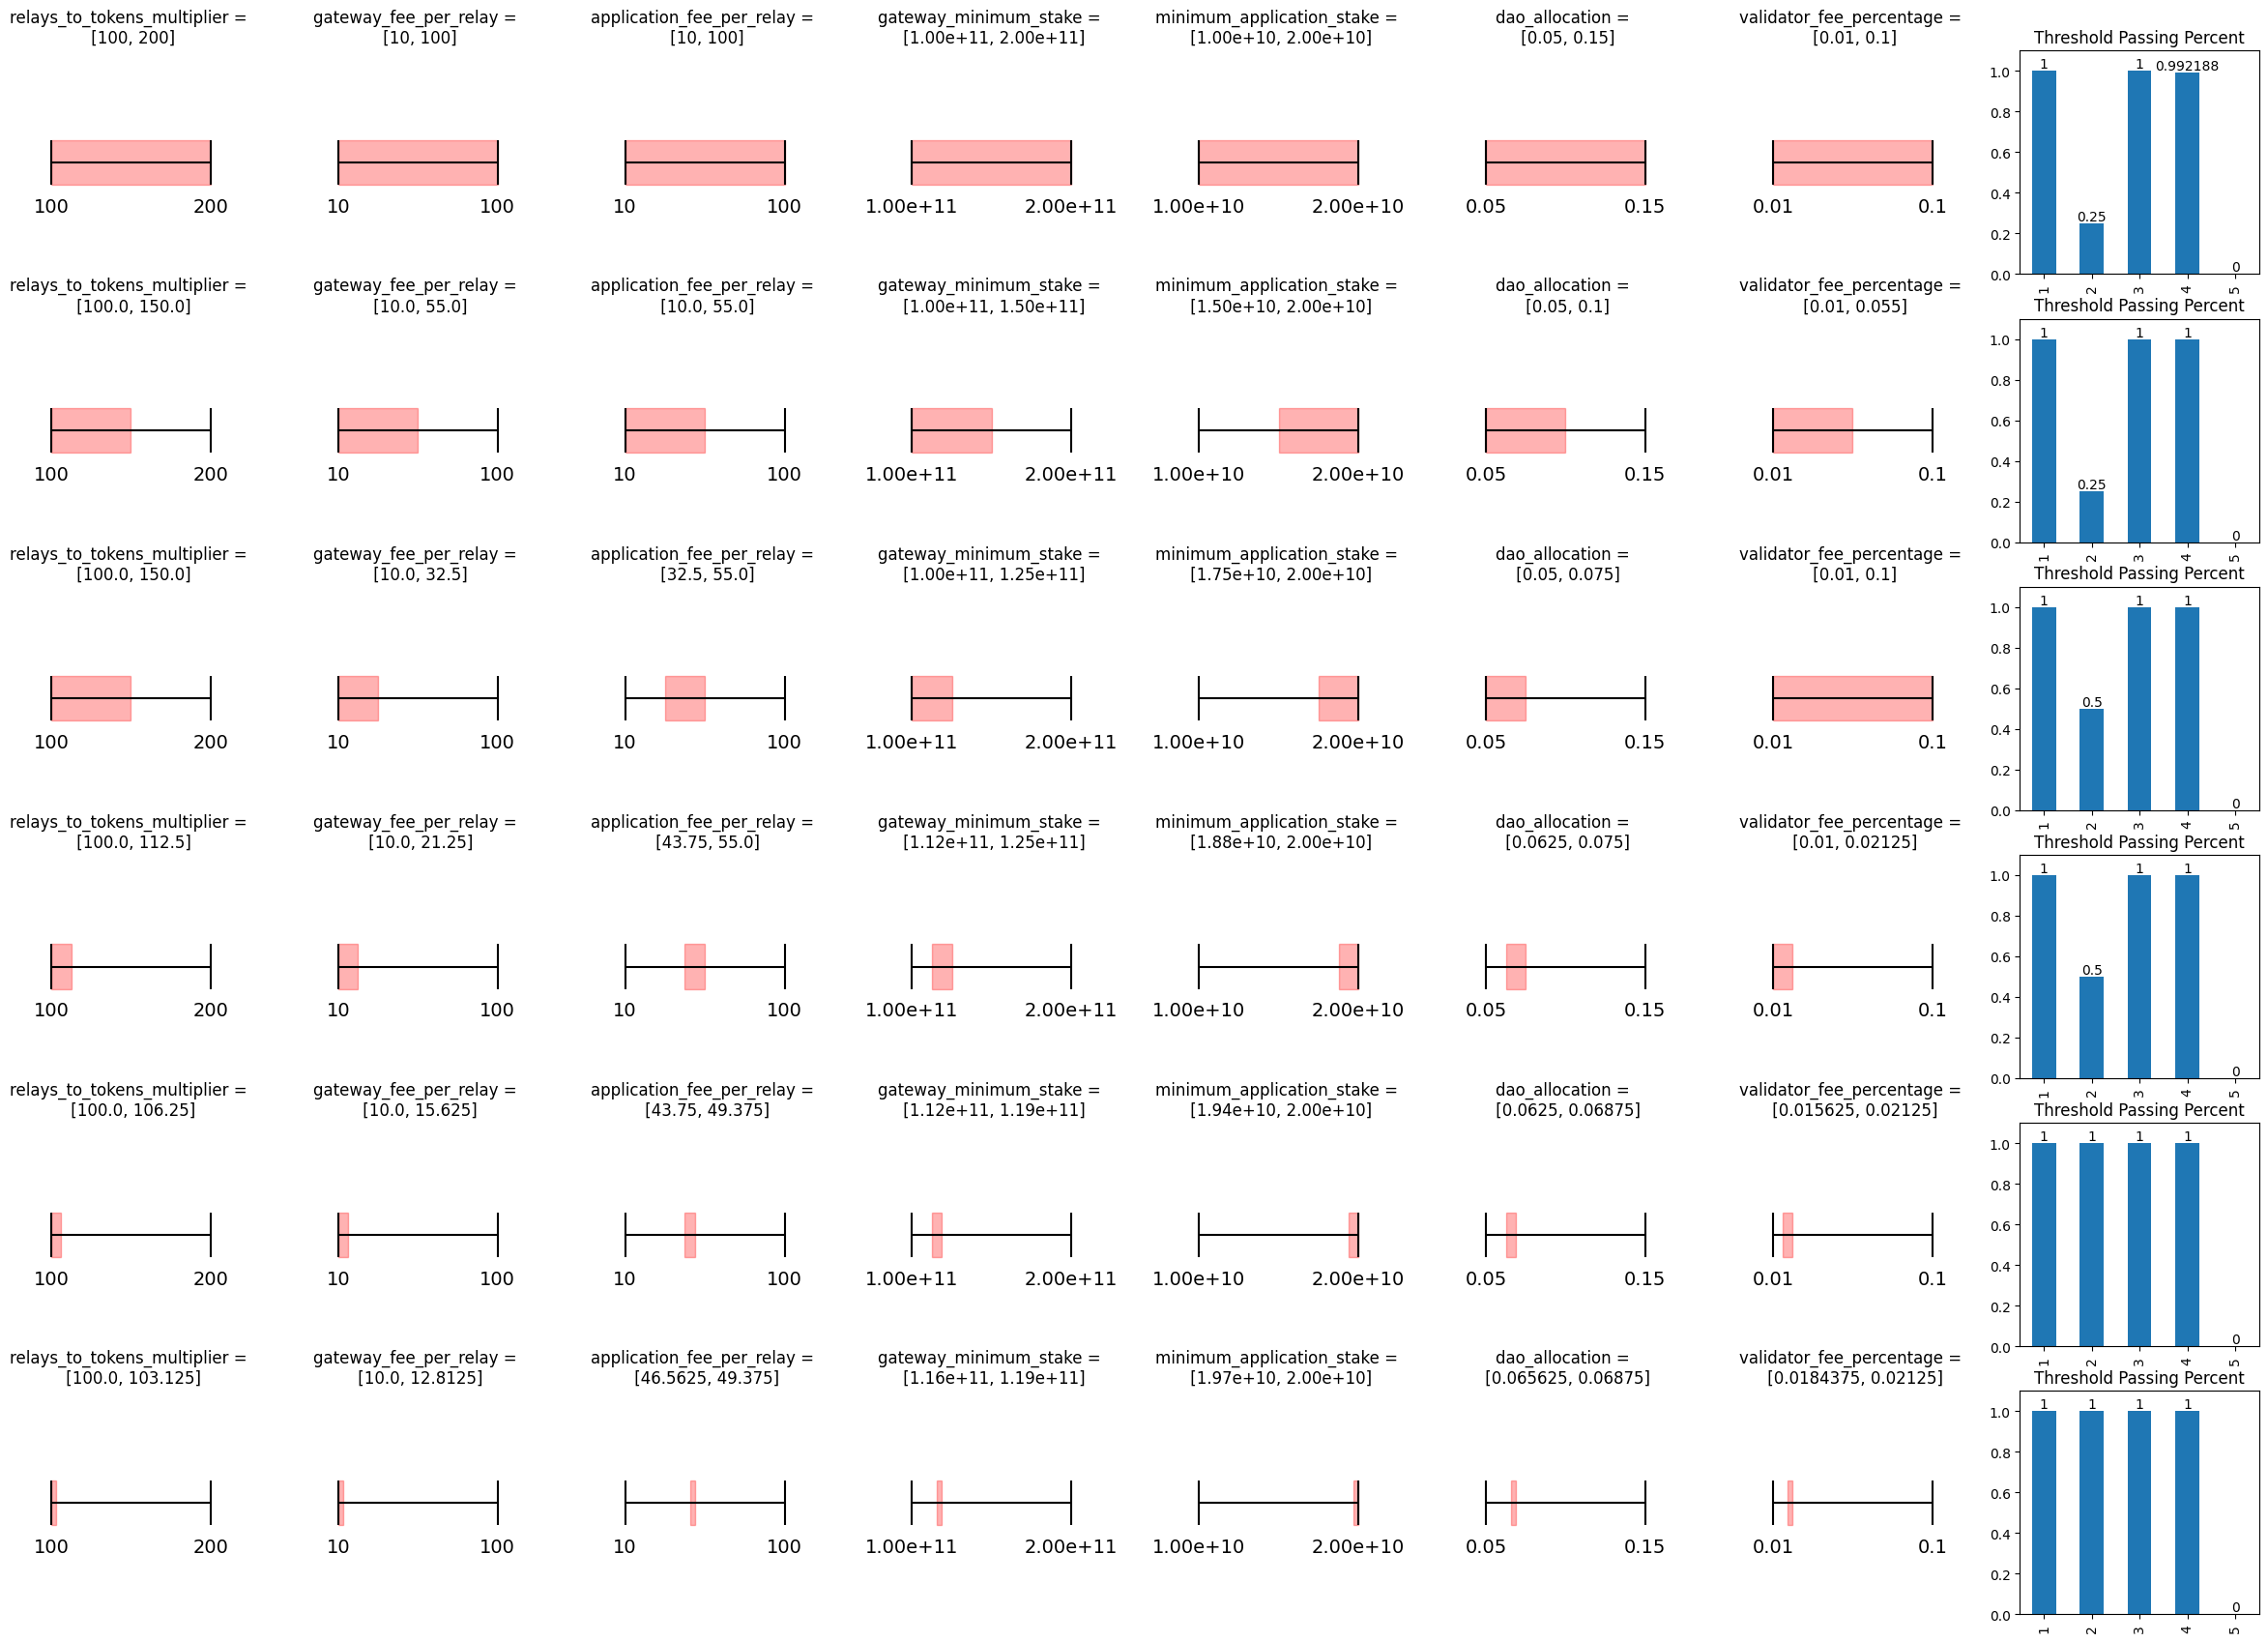

In [8]:
scenario_sweep_category = 'network_failures_oracle_ag'
kpis = load_scenario_kpi_comparison_data(scenario_sweep_category)
threshold_comparison_plot(kpis[scenario_sweep_category])

# Protocol Parameter Recommendations

From the adaptive grid results, the recommended parameter ranges for the swept protocol parameters are:

| Full Name |  Abbreviation | Recommended Range | Units |
| --- | --- | ---| ---|
| `RelaysToTokensMultiplier` | `RTTM` | (100, 103.125) | uPOKT/relay |
| `GatewayFeePerRelay` | `GFPR` | (10, 12.8125) | uPOKT/relay |
| `ApplicationFeePerRelay` |`AFPR` | (46.5625, 49.3750) | uPOKT/relay |
| `GatewayMinimumStake` | `GMS`  | (1.16e5,1.19e5) | POKT |
| `ApplicationMinimumStake` | `AMS`  | (1.97e4, 2.00e4)  | POKT |
| `DAOAllocation` | `DAL`  | (0.065625, 0.068750) | %/100 |
| `ValidatorFeePercentage` | `VFP`  | (0.0184375, 0.0212500) | %/100 |

# Decision Tree and Parameter Importance

## Decision Tree Classification

A decision tree is a machine-learning-based classifier. Given the simulation results, for each threshold inequality the tree recursively associates different _samples_ from the results, according to sorting criteria based upon one or more of the protocol parameters of the simulation.

Each decision tree below corresponds to one of the threshold inequalities stated above. Where the decision tree is 'empty', the threshold inequality was either 1) always fulfilled during the simulations, or 2) never fulfilled during the simulations. In this case no sensitivity analysis can be performed, as the threshold inequalities do not vary according to the different parameter combinations that were swept.

The title of the decision tree includes the threshold inequality under scrutiny, in addition to a technical 'score' (usually "100%") and the number of simulation results used as the dataset. Within the decision tree presented, each **non-terminal** 'node' is labeled with the following information:

1. The sorting variable used and its cutoff value used for classification, in the form of `parameter_name <= x` where `x` is the cutoff value. Branches to the left of this node indicate satisfaction of this inequality, while branches to the right indicate violations, i.e. `parameter_name > x`.
2. A Gini coefficient representing the method of recursive association used.
3. The total number of simulation results ("samples = y%") as a percentage "y" that are considered at this node.
4. The breakdown of the simulation results considered into the left and right branches ("value = [p, 1-p]"), where "p" is the fraction of results that satisfy the `parameter_name = x` constraint, and "1-p" the fraction satisfying `parameter_name > x`.
5. The classification of the majority of the simulation results at this node (note that this is not a final classification, as it appears in a non-terminal node, and can be arbitrary if the results are split equally across classes).

**Terminal** nodes ("leaves") represent the final classification of that proportion of the simulation results that arrive at the node, and have most of the same information as a non-terminal node, with the exception that there is no branching performed and hence no sorting variable displayed. Here the most important information is the classification (last line). 

Non-terminal and terminal nodes colored in blue correspond to the threshold inequality being met, and by following blue boxes from a terminal node up to the root of tree a set of `parameter_name <= x` and/or `parameter_name > x` sorting criteria can be chained together. 

Upon successful classification, it is usual for the terminal node to have a breakdown "value = [1.0, 0.0]" or "value = [0.0, 1.0]", indicating that 100% of the remaining simulation results treated are either satisfying the threshold inequality under treatment (left value is 1.0), or not satisfying the threshold inequality (right value is 1.0).

For further information regarding the decision tree approach adopted here please see the [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#) documentation from the `scikit-learn` library.

## Feature Importance

Below each non-empty decision tree is a bar graph indicating the relative importance of each swept protocol parameter ("feature") in determining the satisfaction of the threshold inequality. This leverages the use of "random forests", which is a technique to average over many different decision tree realizations over different subsets of the simulation results, assessing the relative contribution of each protocol parameter in the branching of each tree. Roughly speaking, the more times a protocol parameter was used in the branching process, the higher its importance is to the threshold inequality--in other words, the protocol parameter carries a larger 'weight' in determining satisfaction or violation of the inequality, and so the inequality is more sensitive to the values of the parameter.

For further information regarding the random forest and feature importance approach adopted here please see the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation from the `scikit-learn` library.

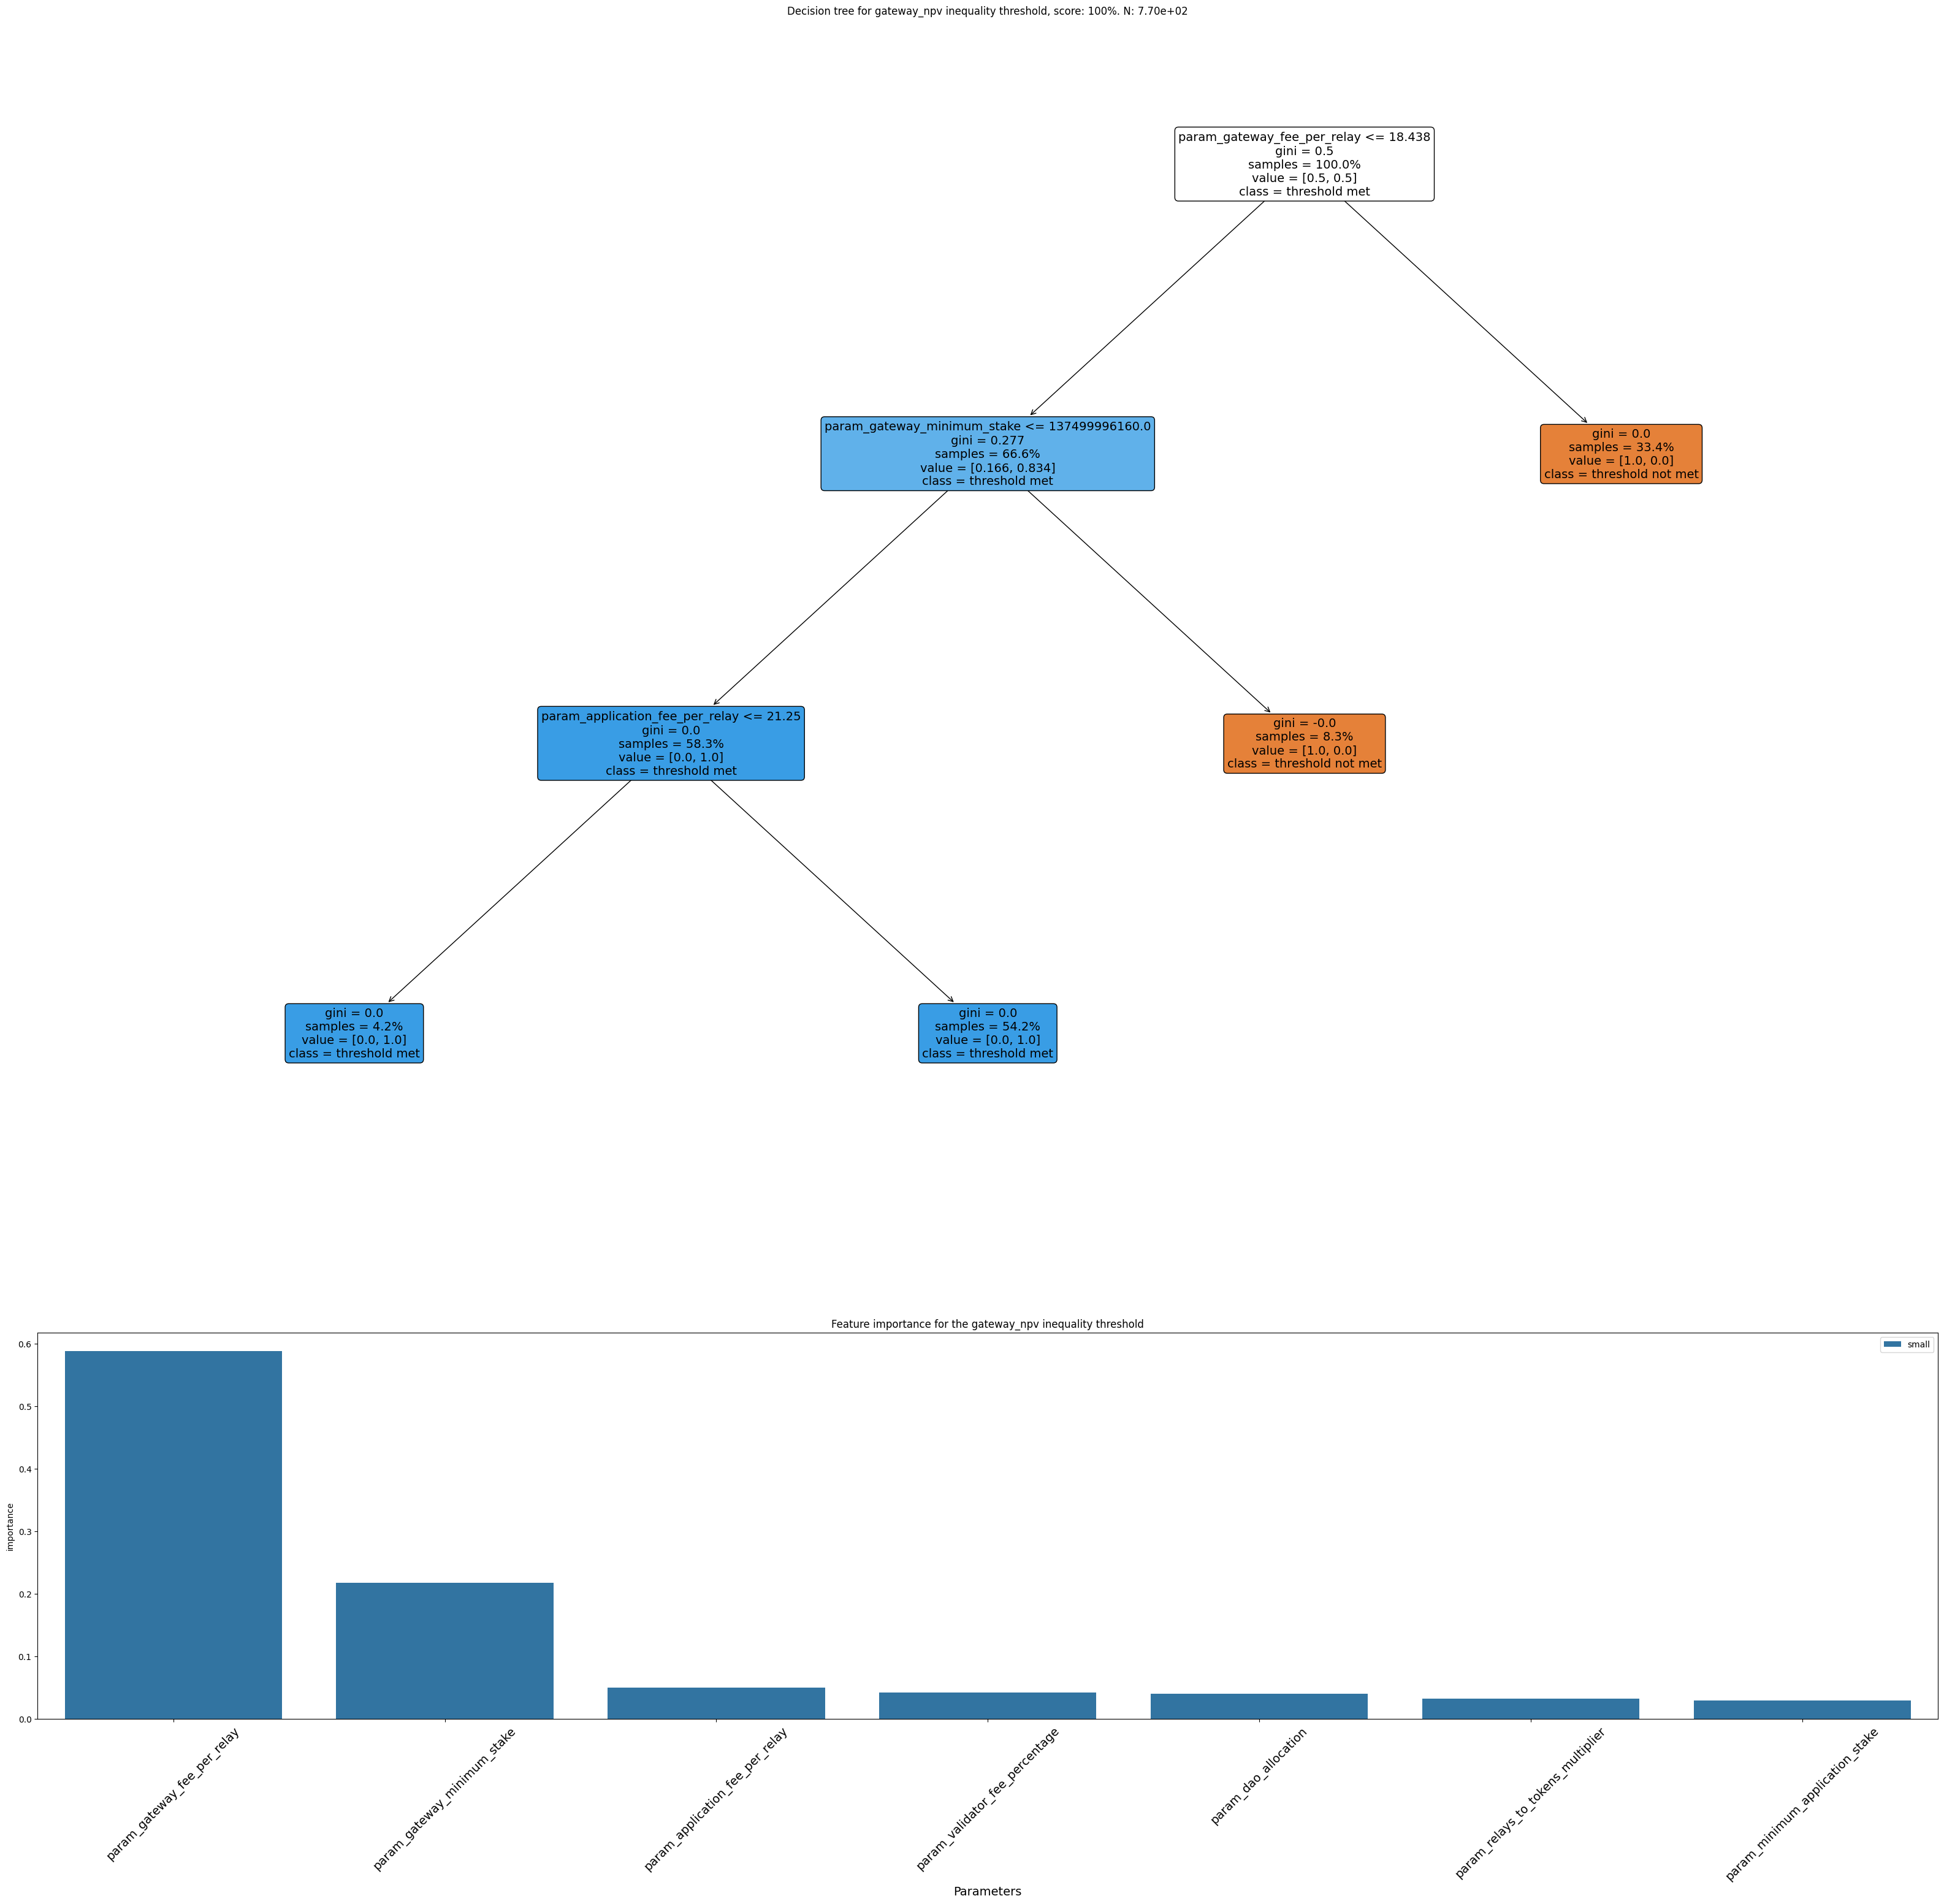

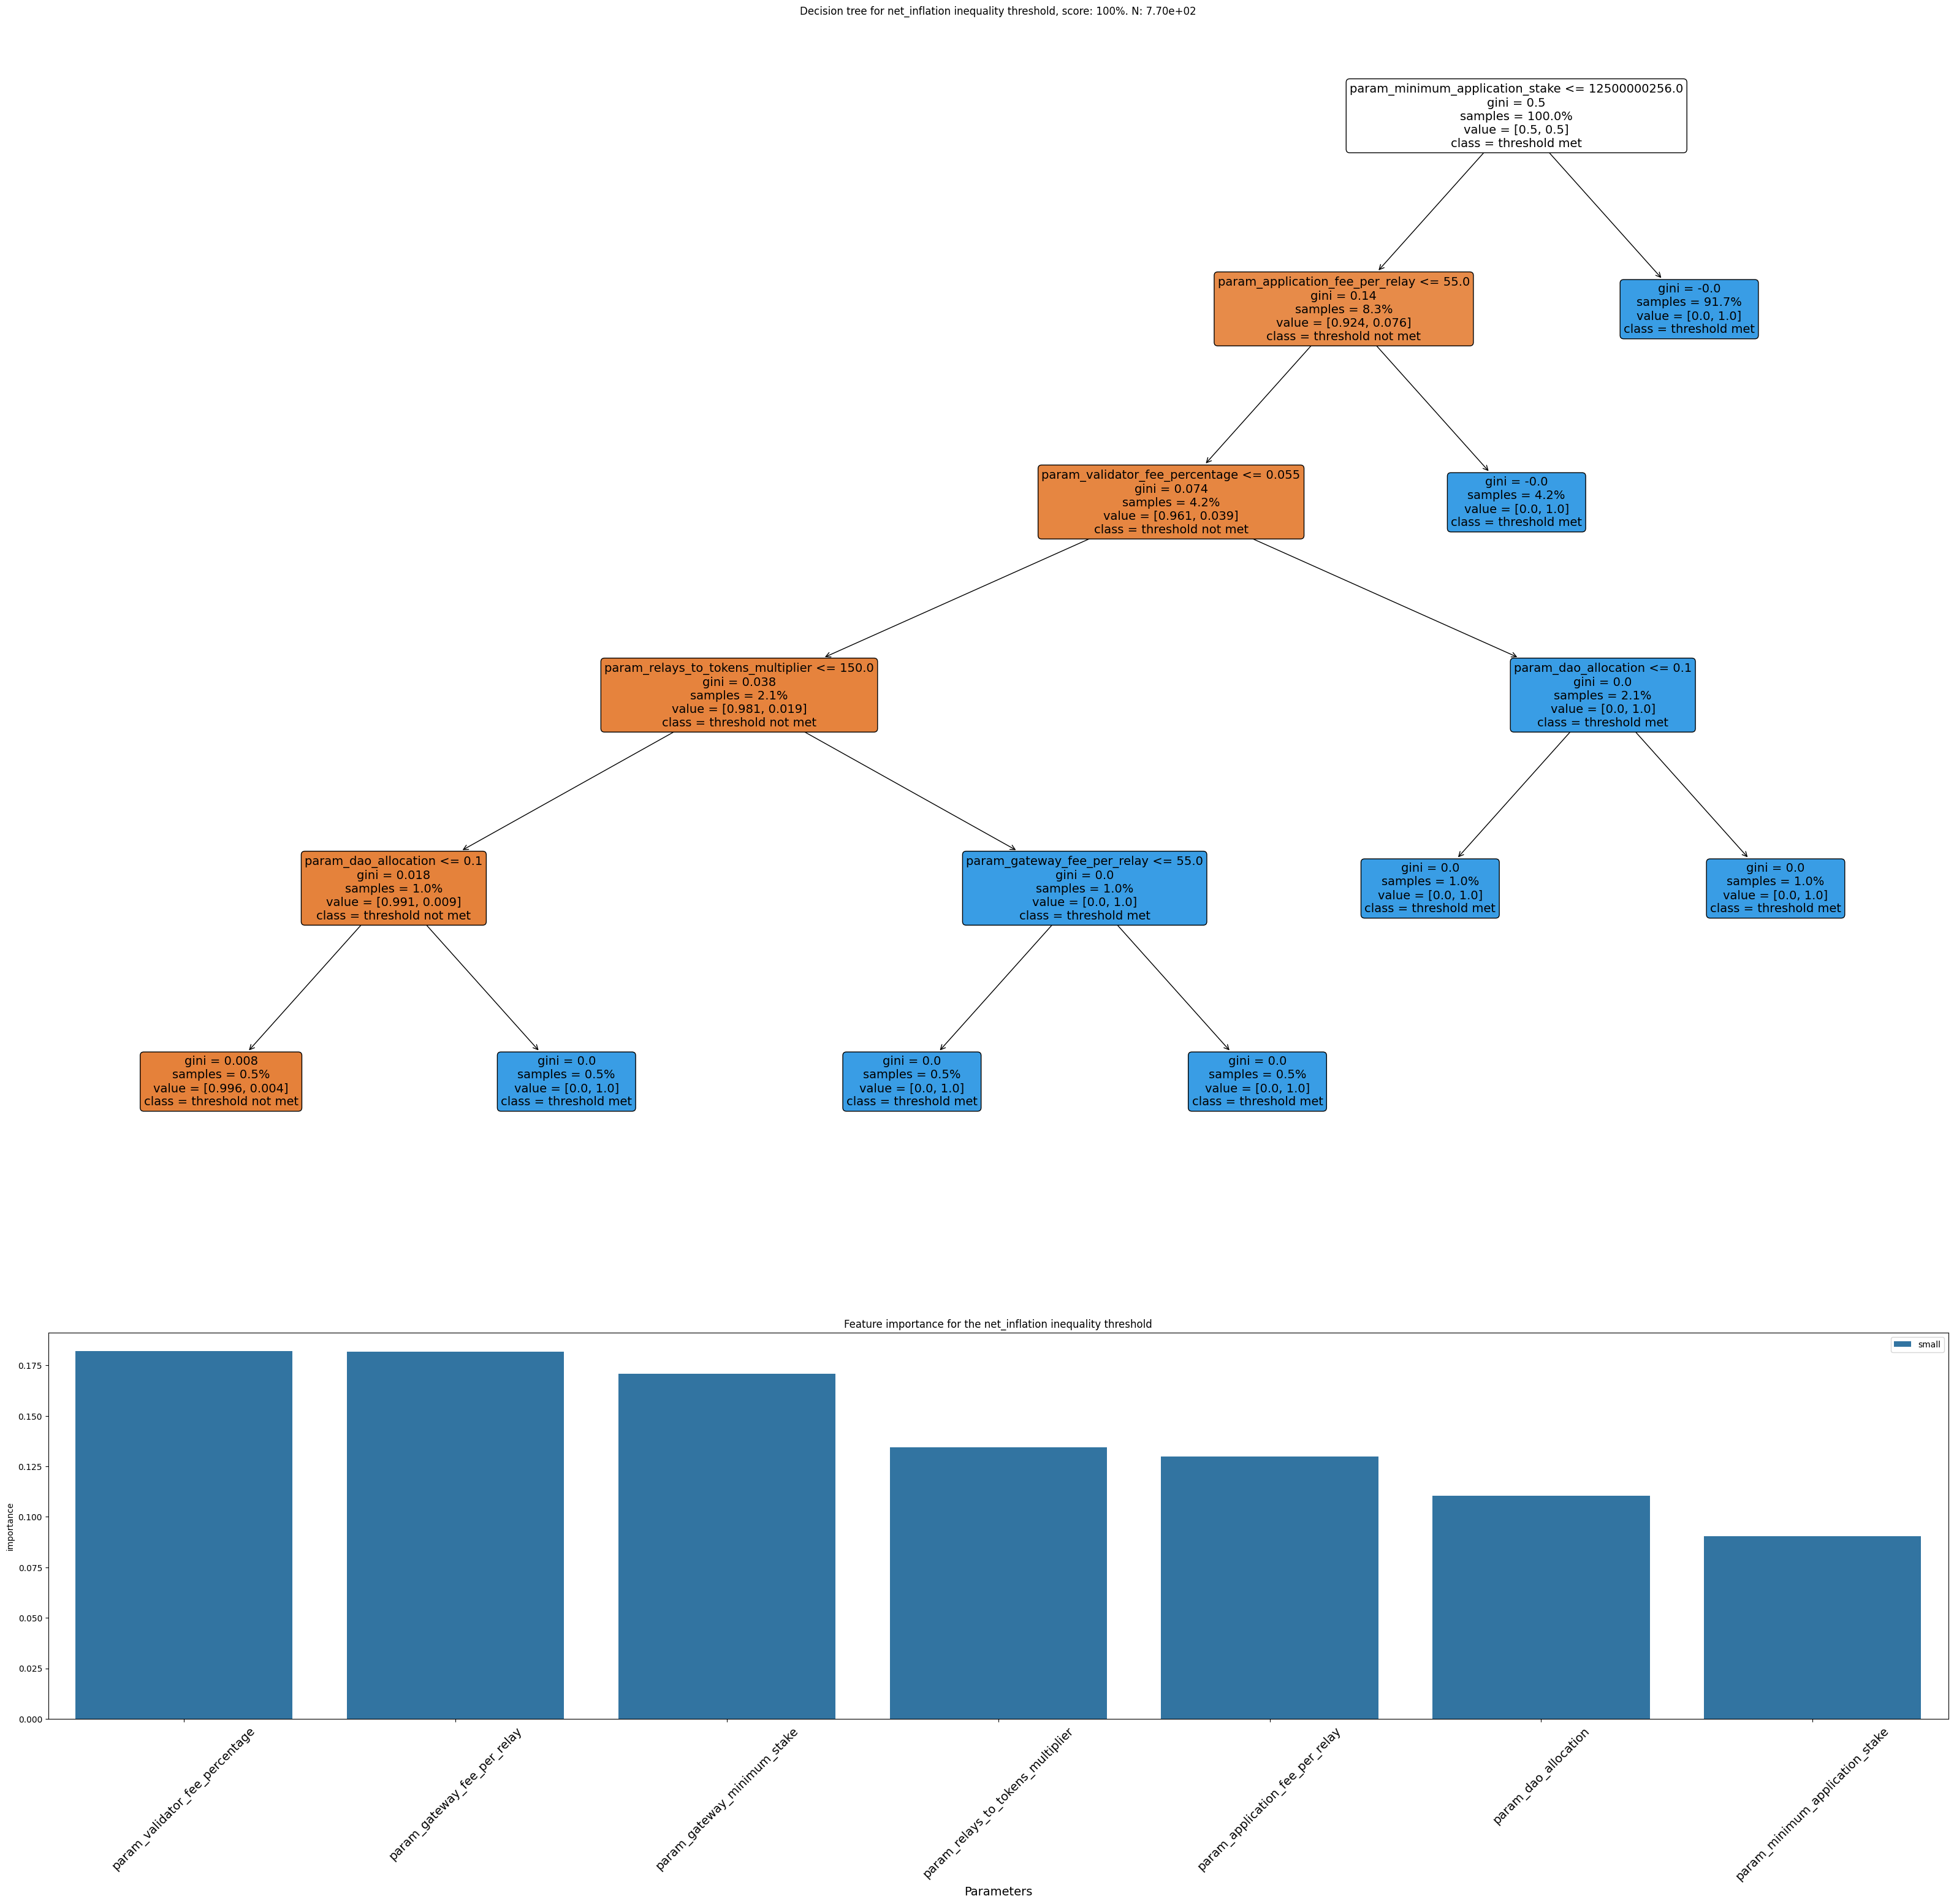

In [9]:
decision_tree_feature_importance_plot(scenario_sweep_category, height = 36, width = 40, font_size = 14)

# Parameter Impact on KPIs

The simulation results provide, for each combination of swept protocol parameter values ("parameter constellations"), a series of outcomes distinguished by different random realizations of stochastic ("Monte Carlo") distributions. Thus, each of the KPIs can be computed for each simulation result, and a _frequency distribution_ or _density_ of KPI values can be generated for each of the iterations of the adaptive grid approach. These densities can be further broken down by protocol parameter value, and the changes in the densities across different values can be visualized. This provides a method of assessing the sensitivity of the KPIs to the protocol parameters, both at the initial adaptive grid implementation, before optimization is performed, and at the end of the implementation, when the recommended parameter ranges have been achieved.

Each group of figures below corresponds to one of the protocol parameters. Each row in a figure group corresponds to a different KPI, and each column to the initial adaptive grid and final adaptive grid simulation results. Within a figure, the density corresponding to each swept value of the associated protocol parameter is presented (generally, the lower sweep value is displayed in blue, while the upper sweep value is in red, although this may not always be the case). 

By examining the changes in the shape of the KPI densities across sweep values and across the adaptive grid results, a qualitative visual assessment of how sensitive the KPI under scrutiny is to the swept protocol parameter can be made.

In [10]:
from psuu.parameter_impact_plots import *
merged_df = read_and_format_data(scenario_sweep_category=scenario_sweep_category)

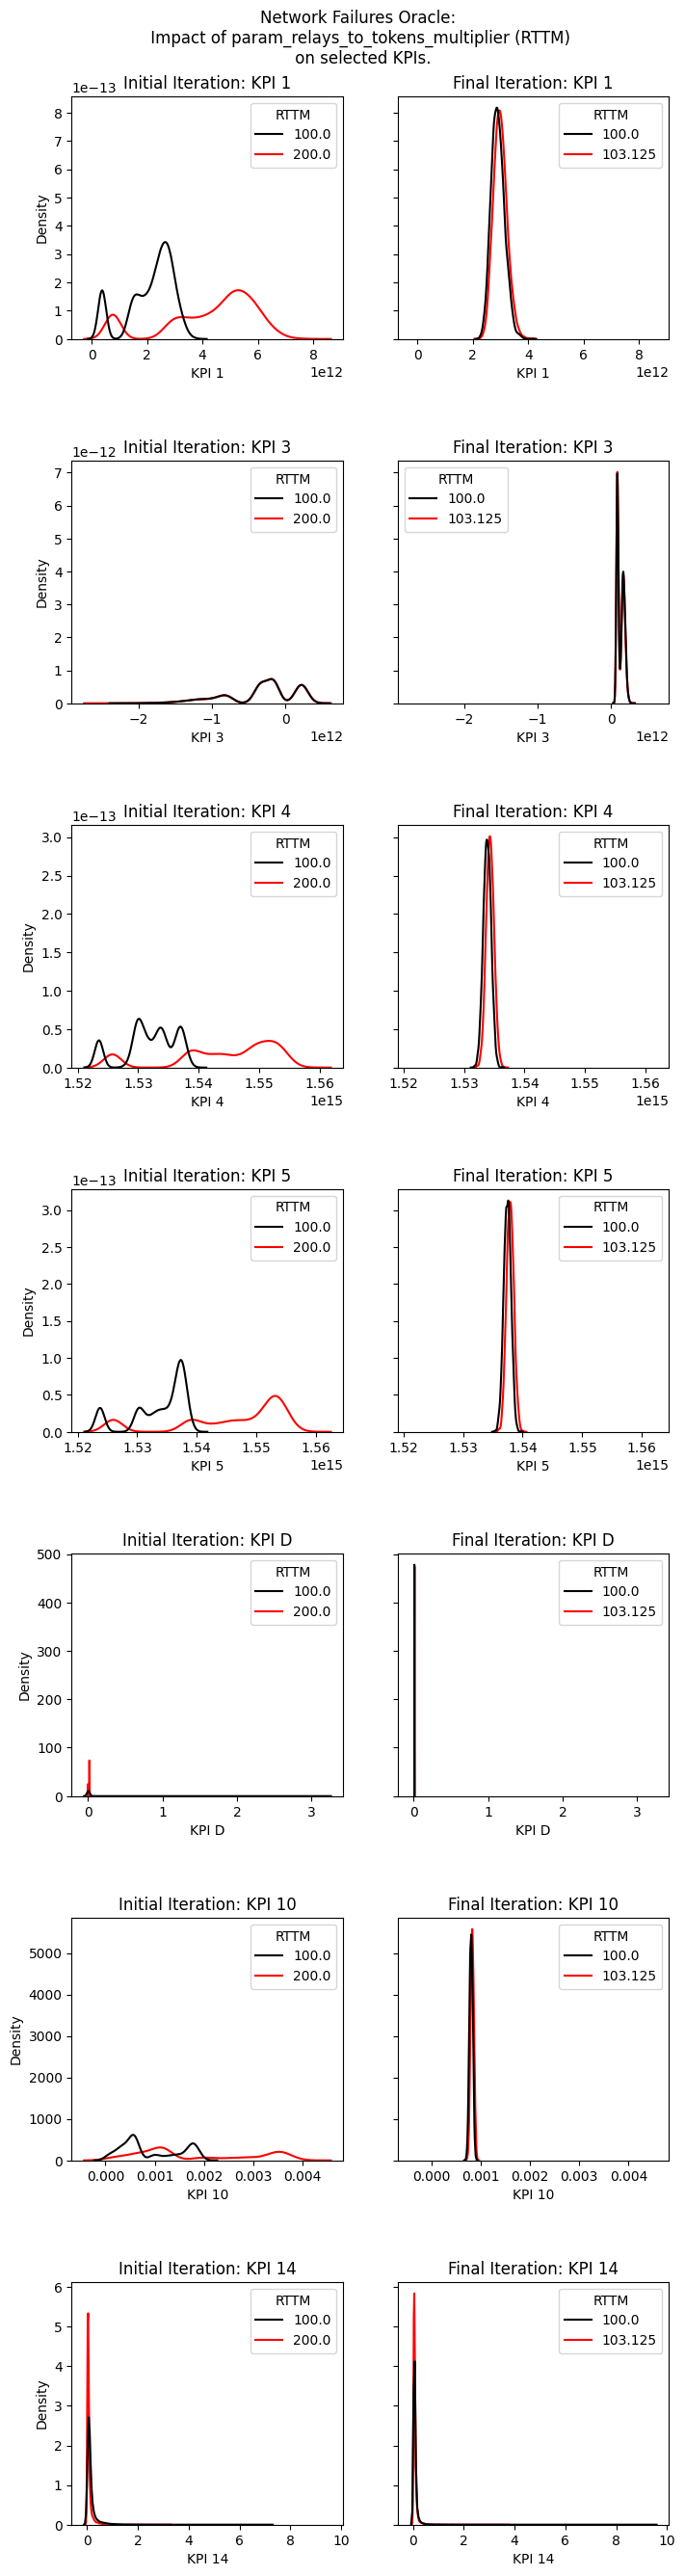

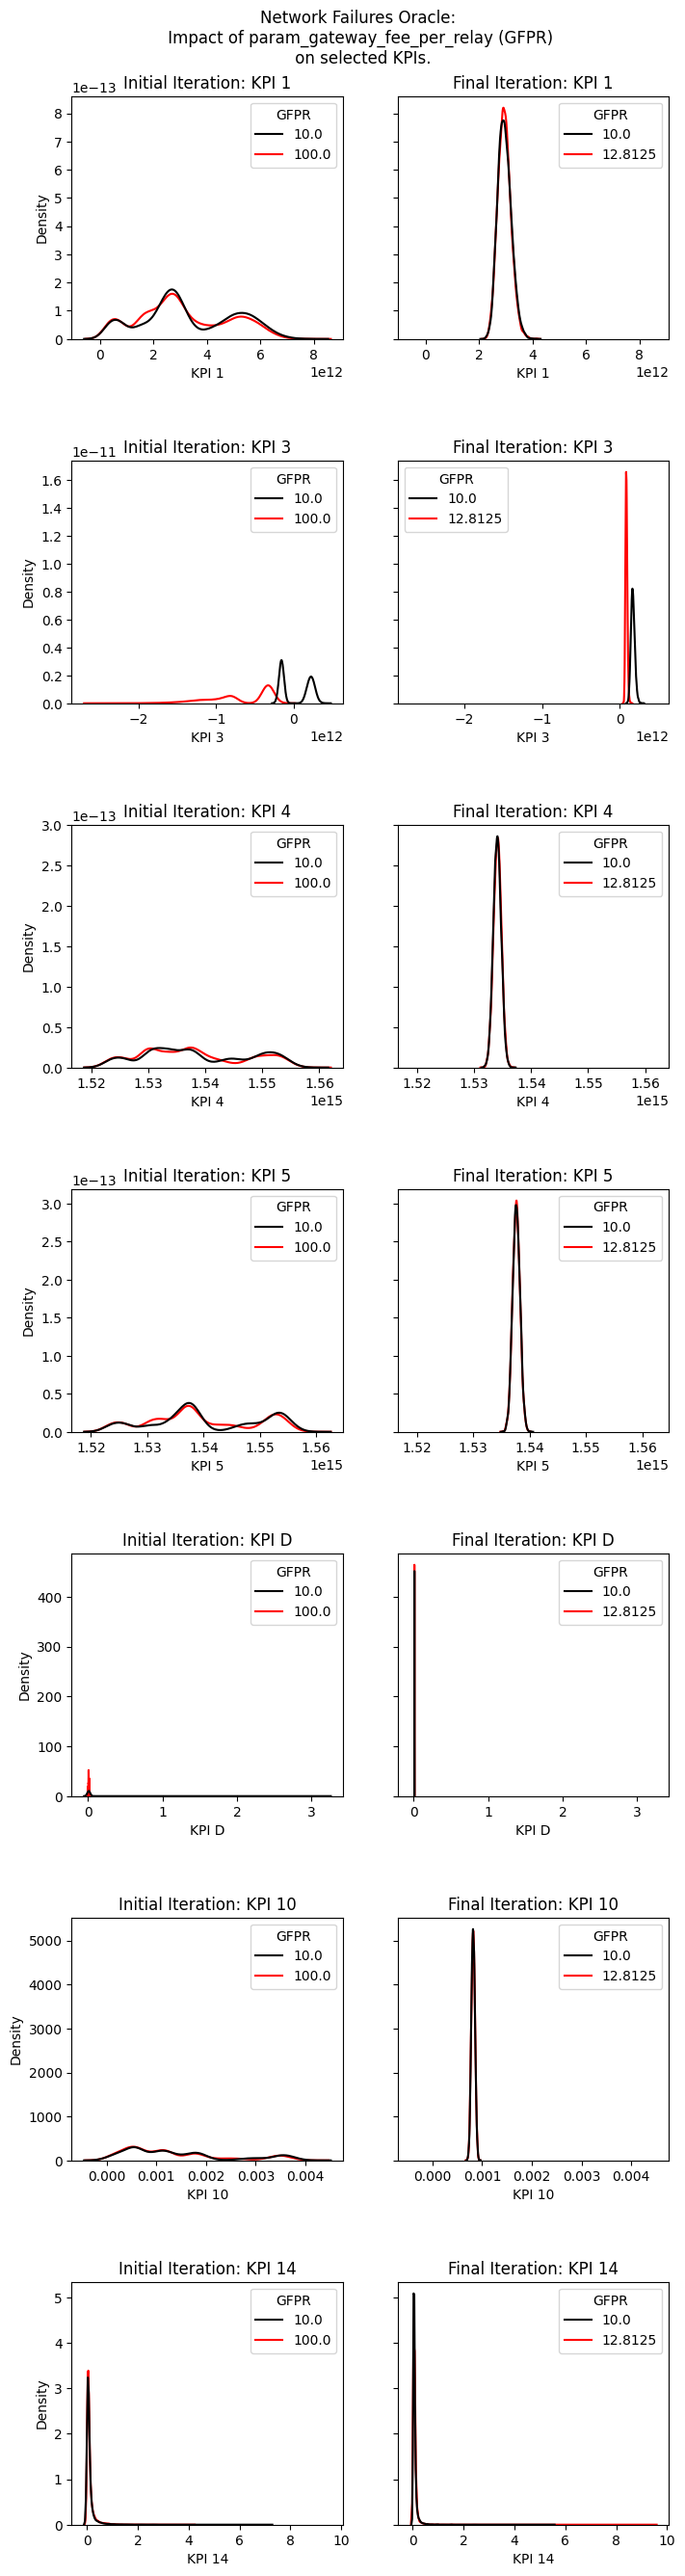

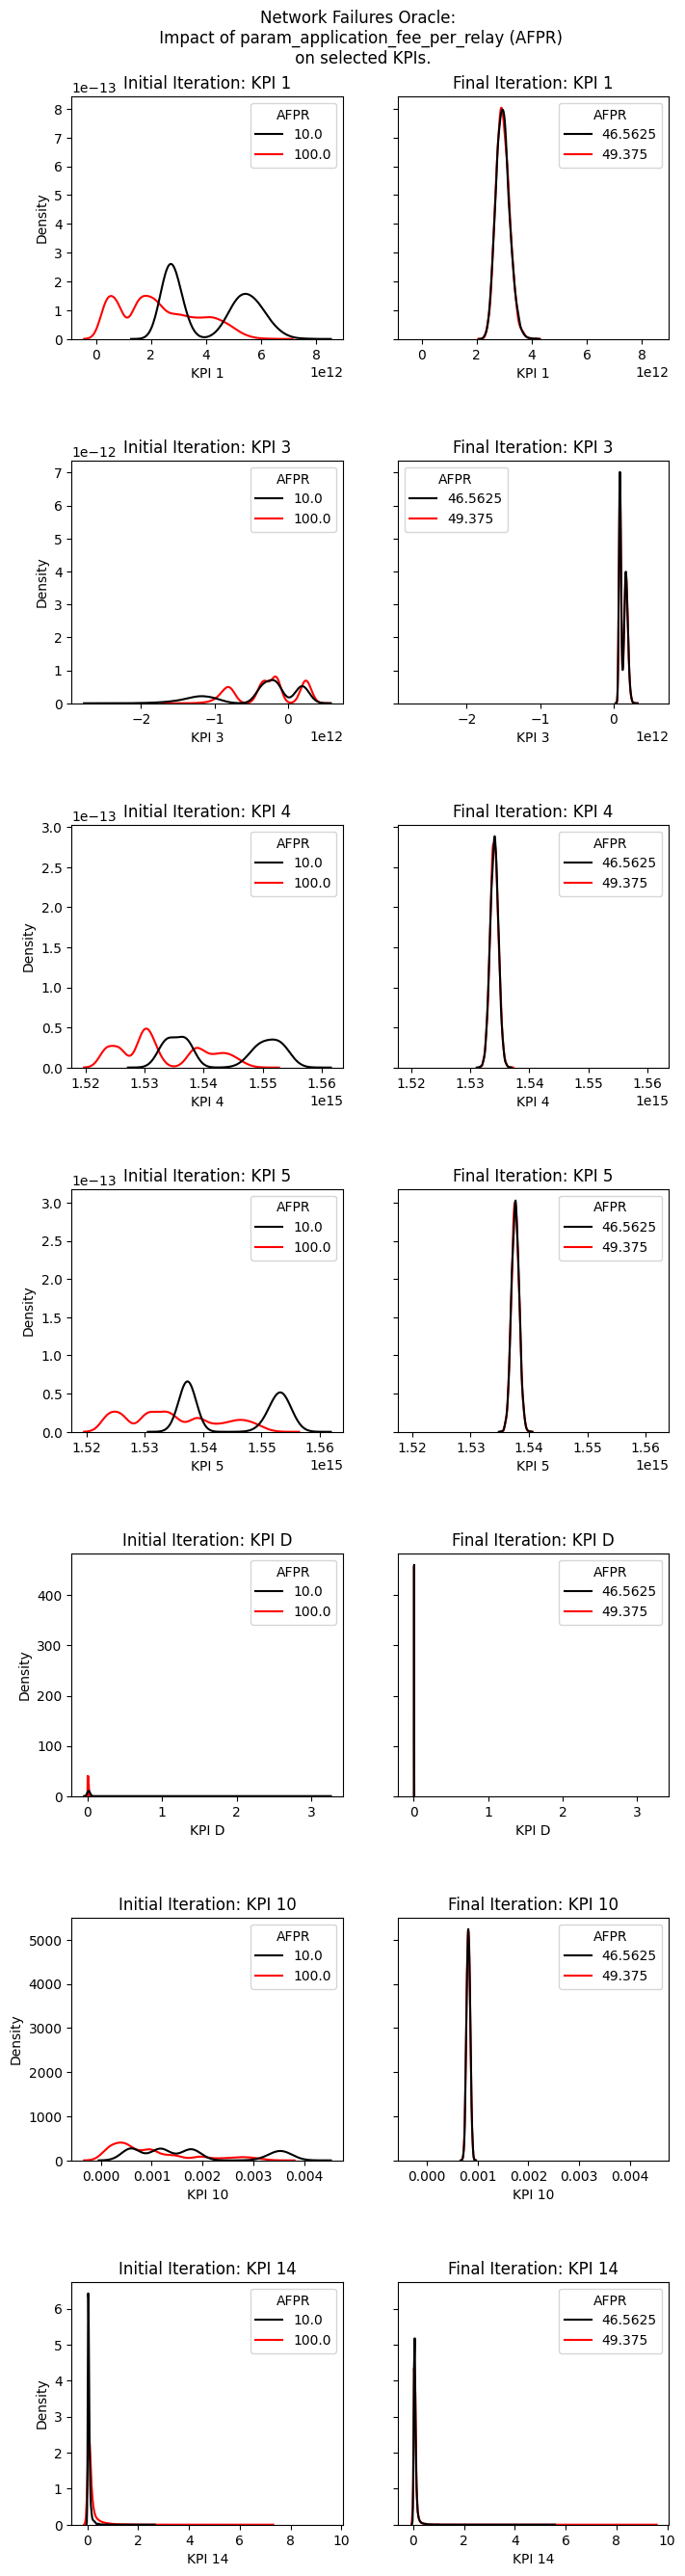

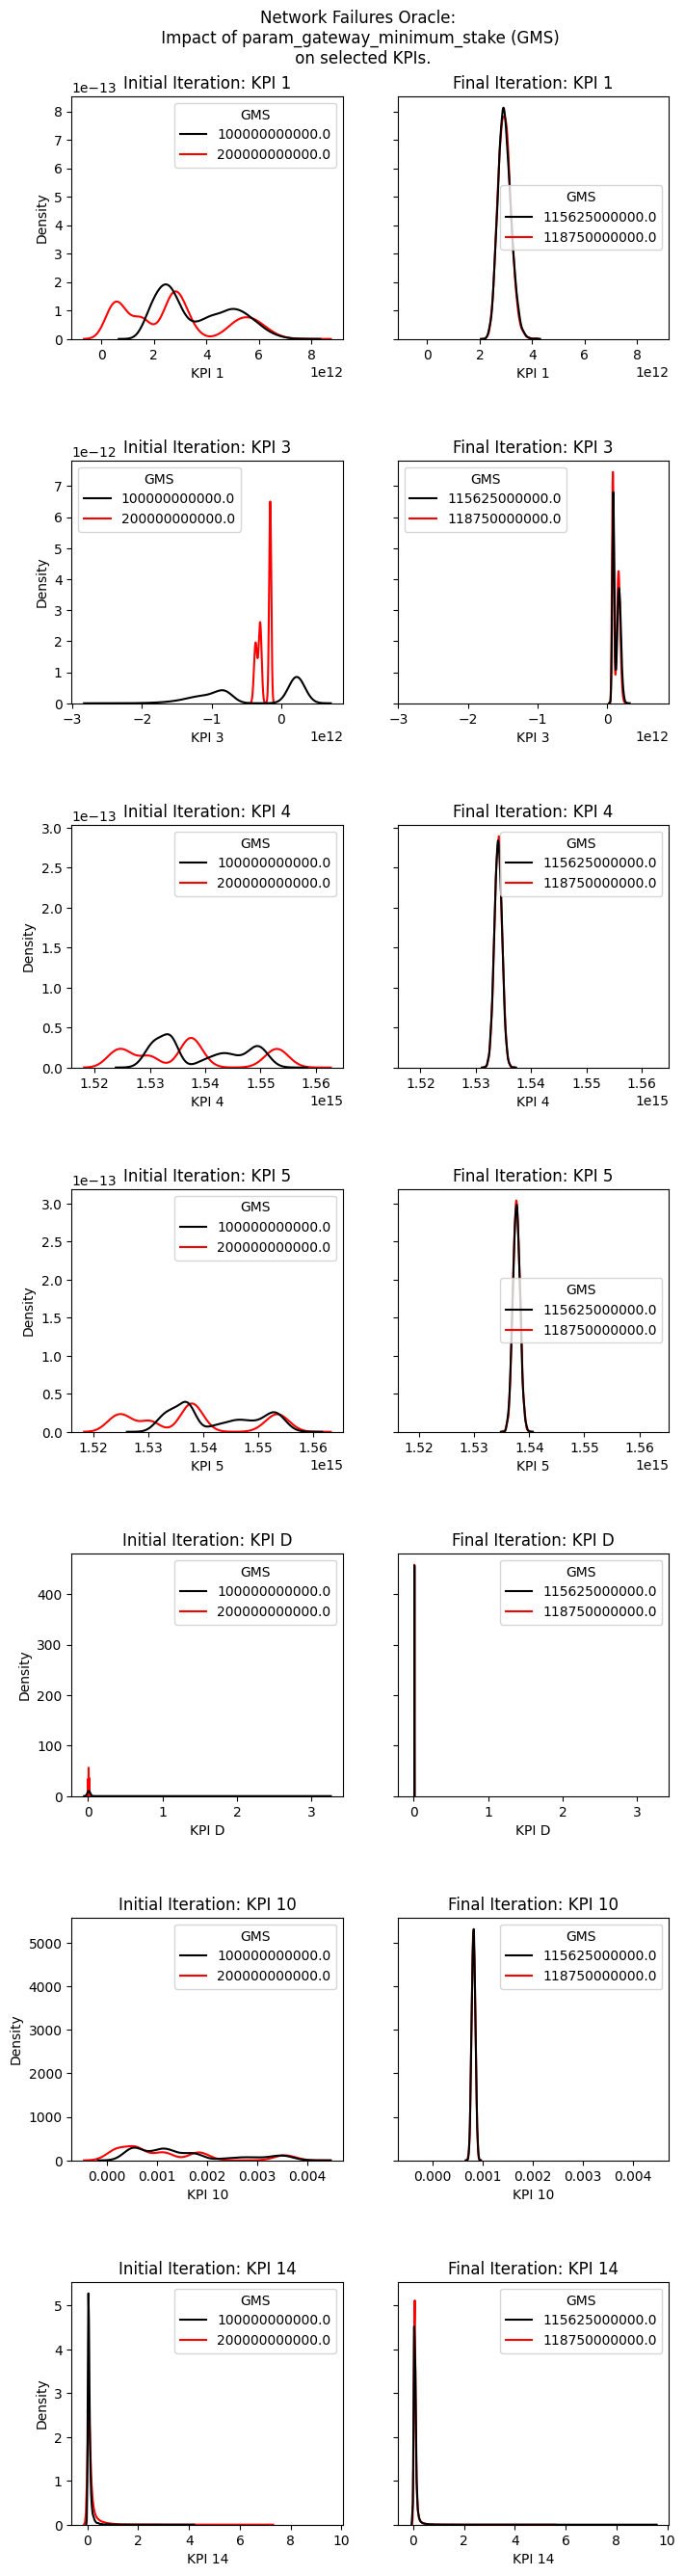

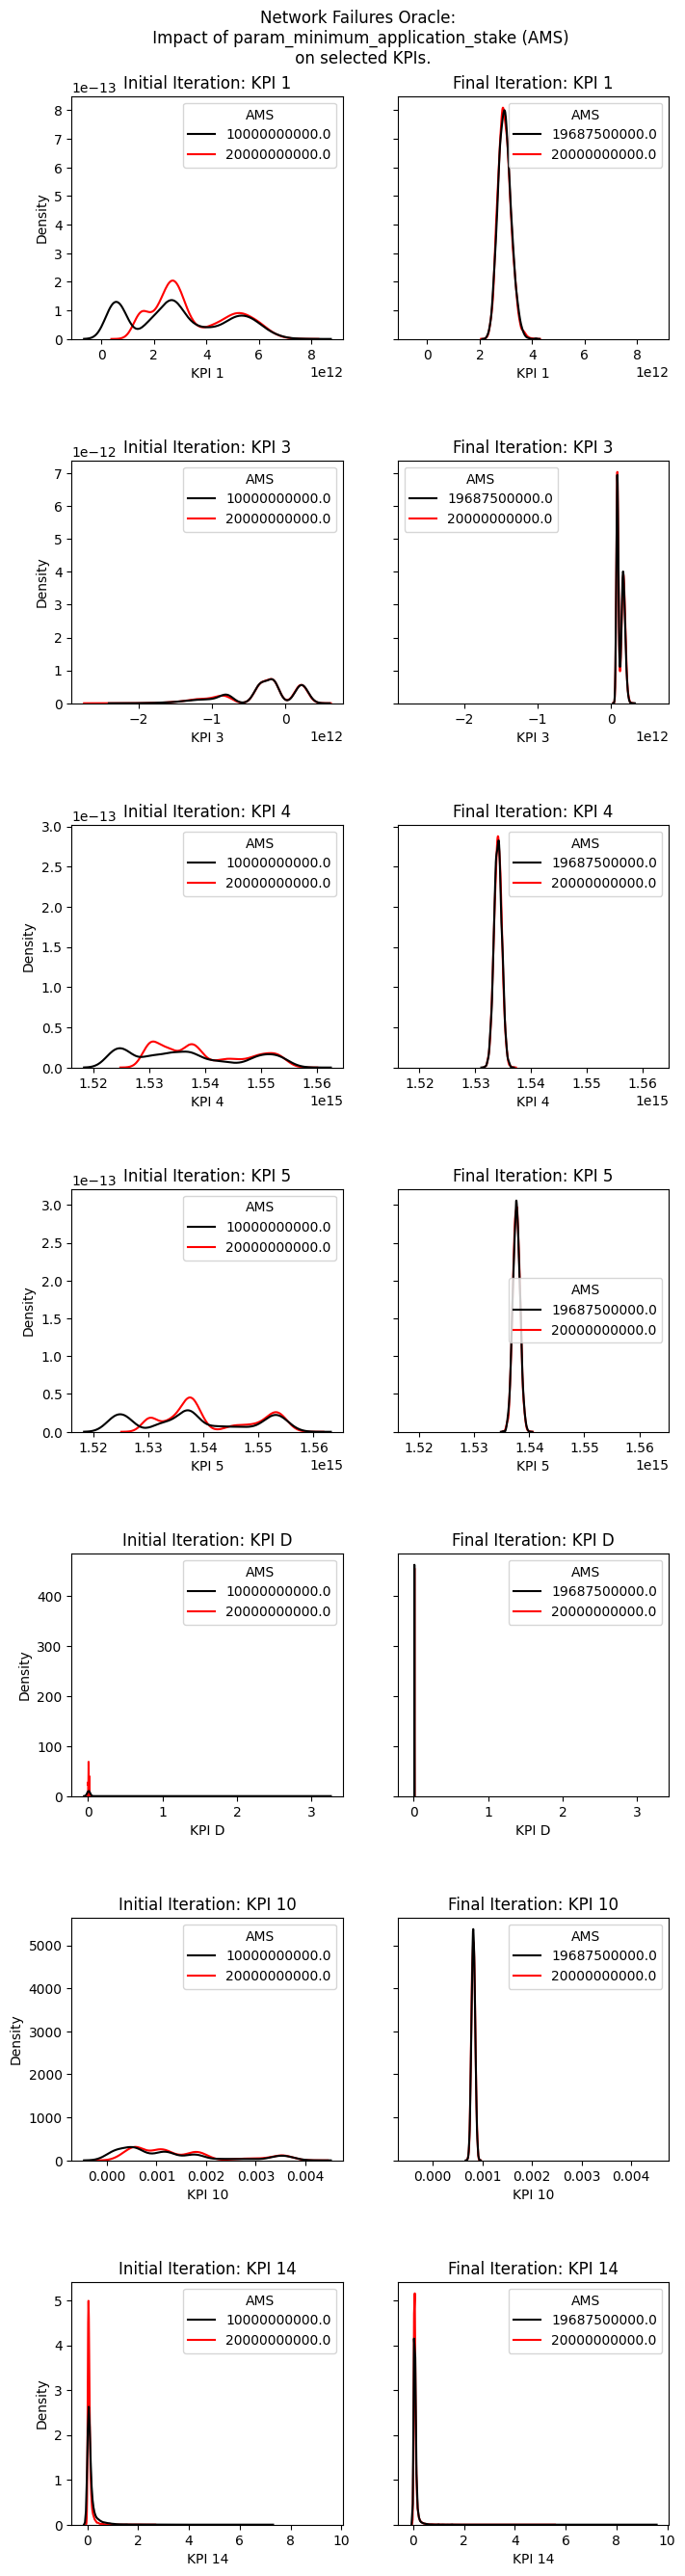

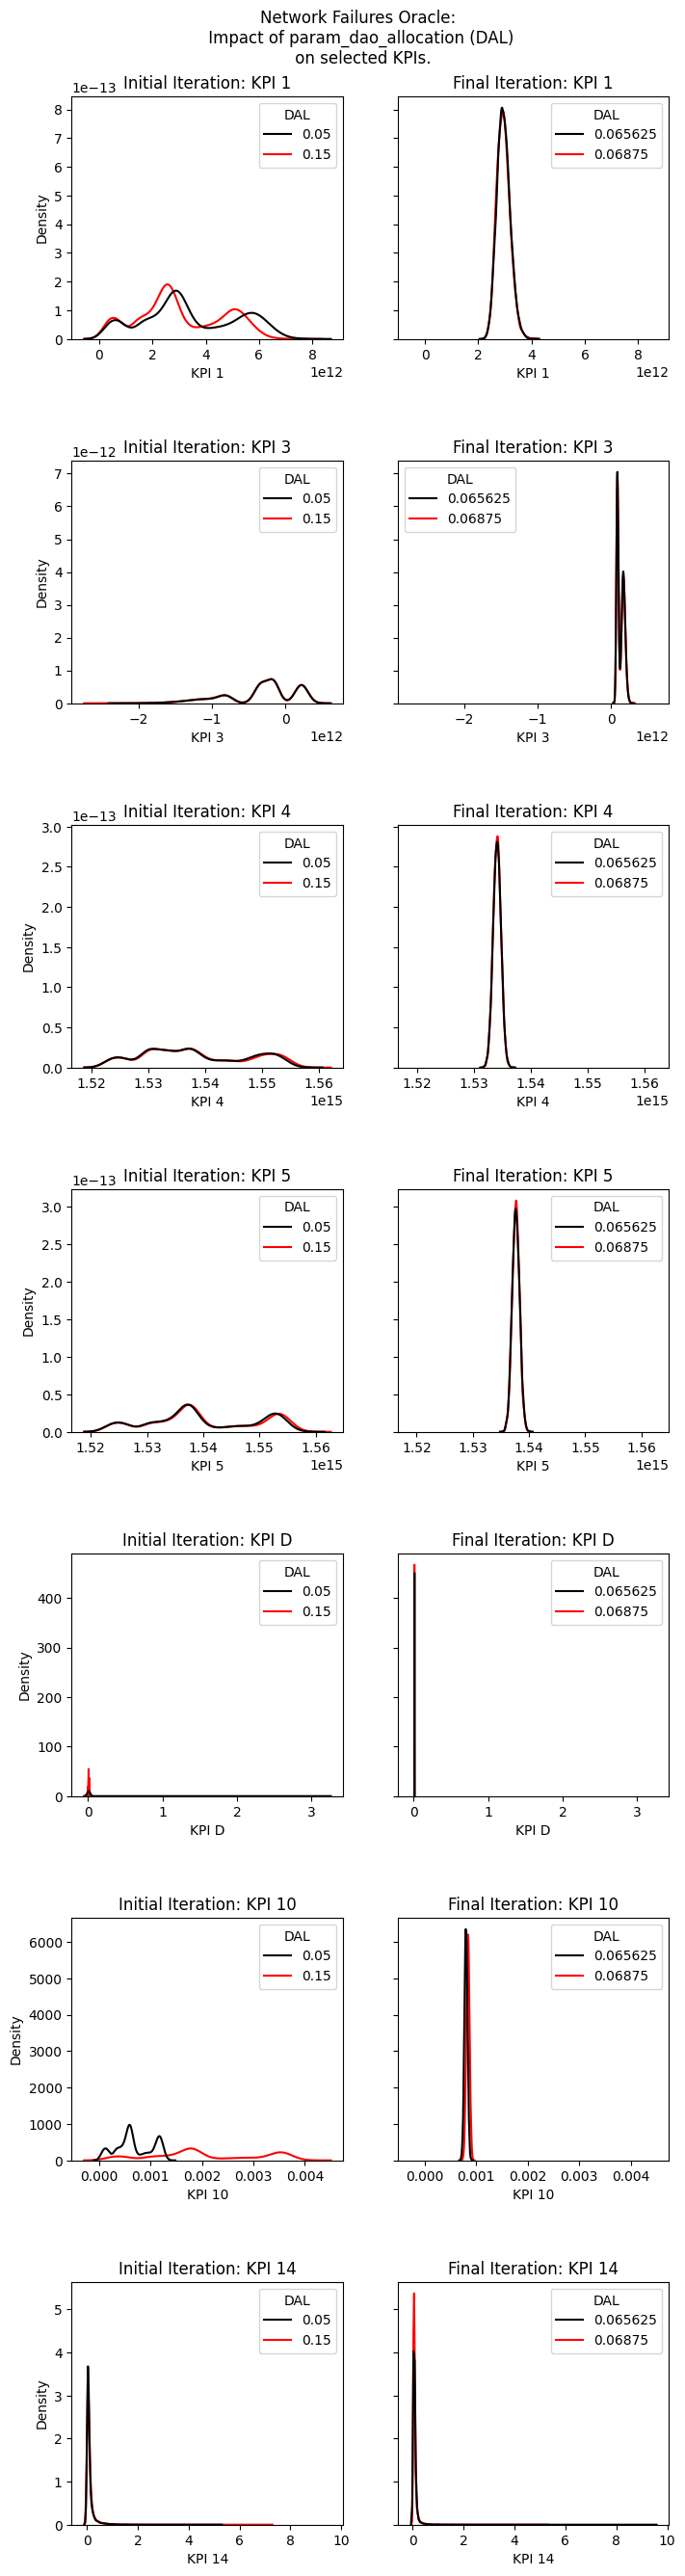

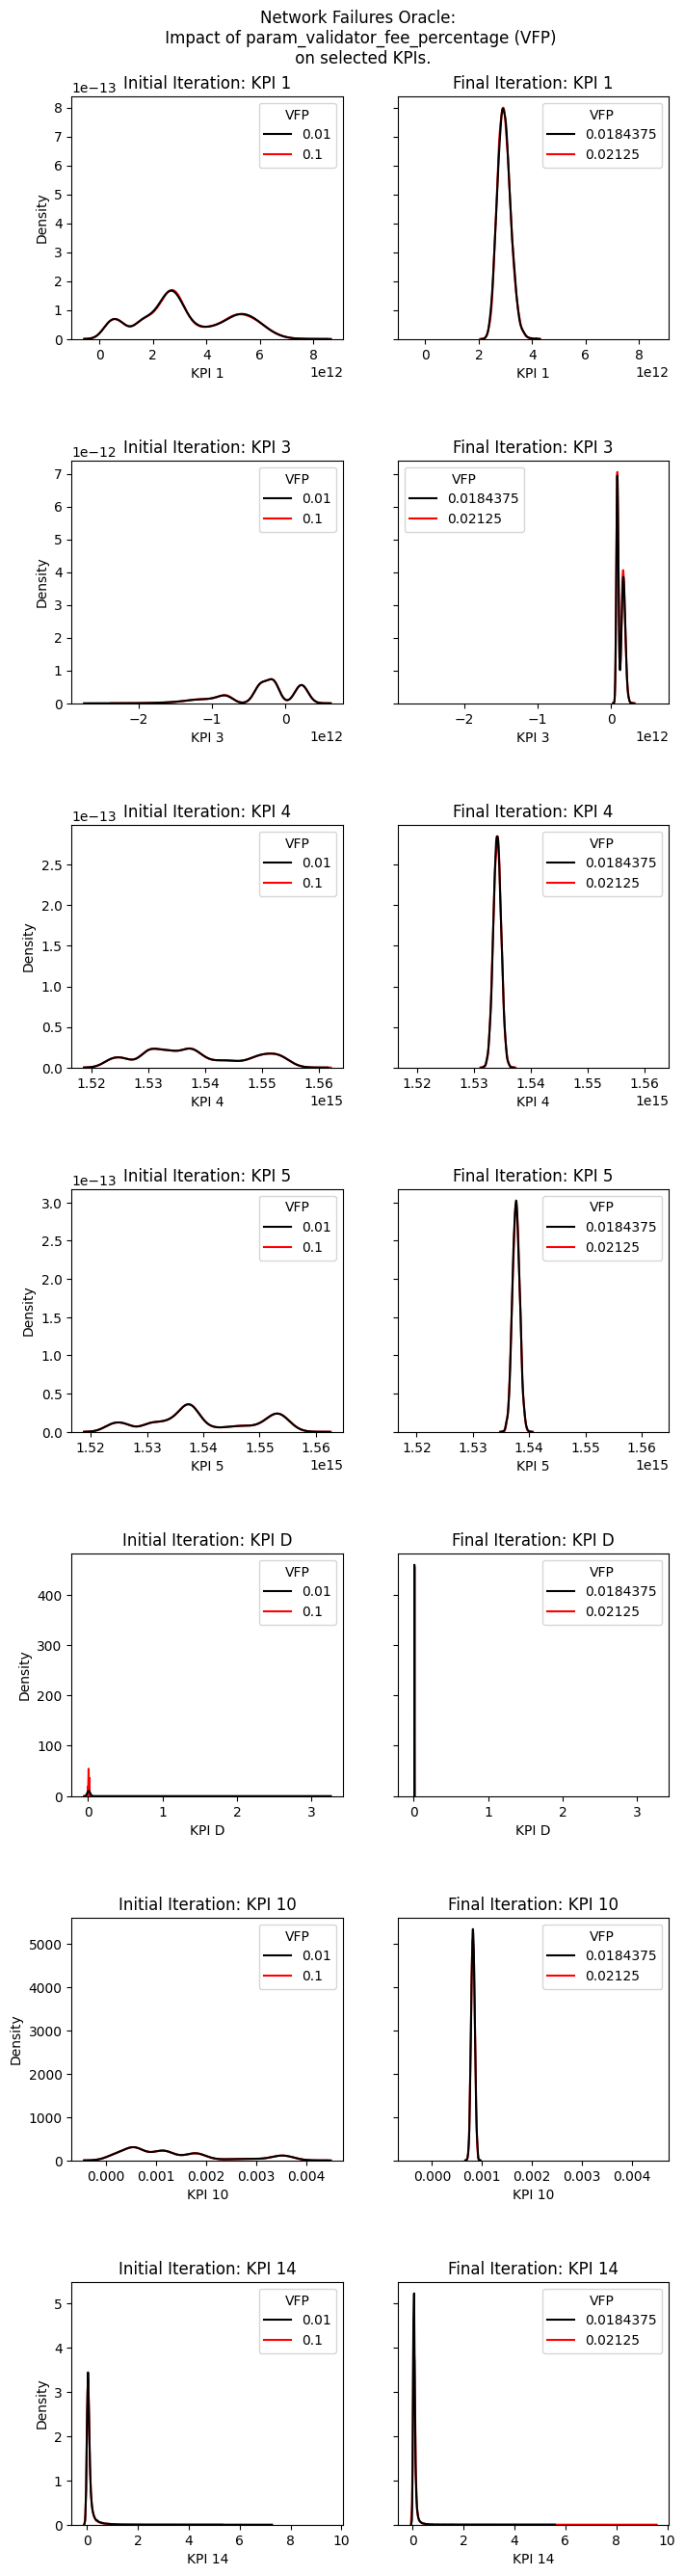

In [11]:
latest_adaptive_grid = max(kpis[scenario_sweep_category])
for param_name in kpis[scenario_sweep_category][latest_adaptive_grid]['variable_params']:
    make_initial_vs_final_plot(df = merged_df,
                           scenario_sweep_category = scenario_sweep_category,
                           param_name = "param_" + param_name, fig_width = 30)

# Conclusion

The oracle price has a direct bearing upon `GFPR`, `AFPR` and `RTTM`, as there are conversions from USD to POKT in their determination that require a USD/POKT price. As such, introducing delays or distortions of this signal can impact the profitability of gateways and servicers and the volatility of relay costs an application is expected to pay. Although the simulations do not incorporate behavioral models for these participants, it is still important to ensure that the system itself remains stable when the price oracle is impeded.

The simulation results imply that this objective appears to be fulfilled. The **servicer NPV** and the **circulating supply to available supply ratio** threshold inequalities were always satisfied for every adaptive grid parameter combination, while the **gateway NPV** and **net inflation** inequalities were eventually satisfied by the conclusion of the adaptive grid search. The **DAO allocation** inequality, although never satisfied, appears to be (as in other scenario group results) because the percentage of POKT held by the DAO is very low relative to the threshold inequality lower bound of 2%.

Although both the **gateway NPV** and **net inflation** threshold inequalities have decision tree results, only the **gateway NPV** results have much bearing on parameter importance (as the variation for the **net inflation** inequality is very low, i.e. it was already satisfied for over 99% of runs for the initial adaptive grid, and was satisfied for all runs thereafter). For the **gateway NPV** tree, as expected the `GFPR` was the most important parameter for threshold inequality satisfaction, which was reflected in 54.2% of the simulation data having a `GFPR` of less than 18.438 uPOKT/relay, a `GMS` of less than 137,000 POKT, and an `AFPR` greater than 21.25 uPOKT/relay. As noted in other reports, `GFPR` is considerably less than `AFPR`, indicating the possibility (absent staking costs) that an application may have an incentive to ‘masquerade’ as a gateway, serving their own relay requests.

The parameter impact plots indicate that increasing `RTTM` reduces the variance of the servicer costs per unit of reward KPI, although its mean does not significantly change. By contrast, increasing `RTTM` does significantly lower the gateway NPV KPI (as might be expected), while reducing its variance. There were also slight reductions in the variance of the gateway NPV KPI and the servicer costs per unit of reward KPI with respect to an increase in the `GMS`. The latter effect was also observed from an increase in the `AMS` and in `DAL`. Finally, increasing `DAL` was associated with a small increase in the net inflation rate.

As mentioned, price distortions are best understood within the context of a behavioral response from participants—but the current results serve as a ‘sanity check’ that the system exhibits stability even when there are perturbations in `RTTM`, `GFPR` and `AFPR` driven by oracle impedance.